<a href="https://colab.research.google.com/github/alexandre-braga/DCC190/blob/main/DCC_190_Lista_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

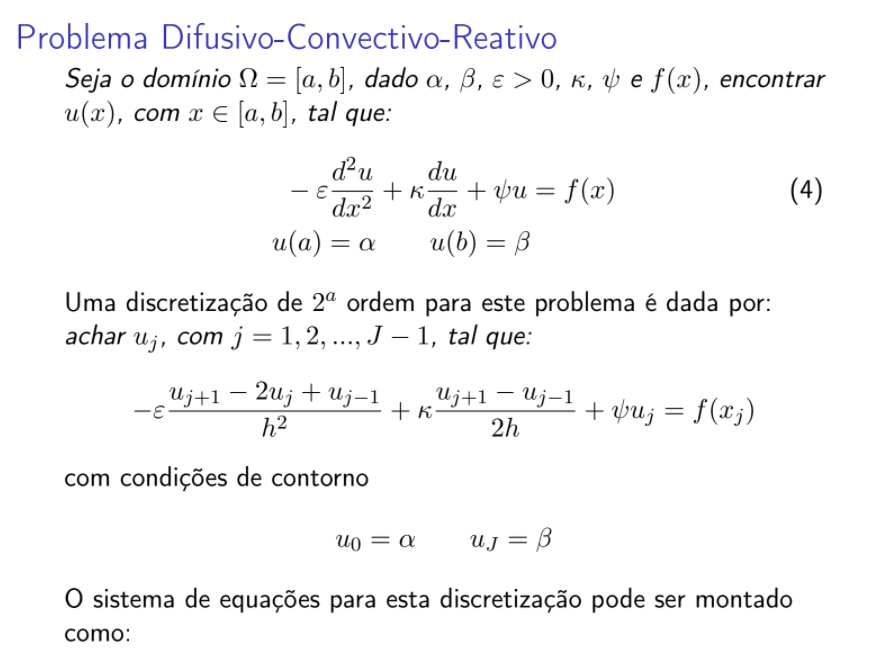

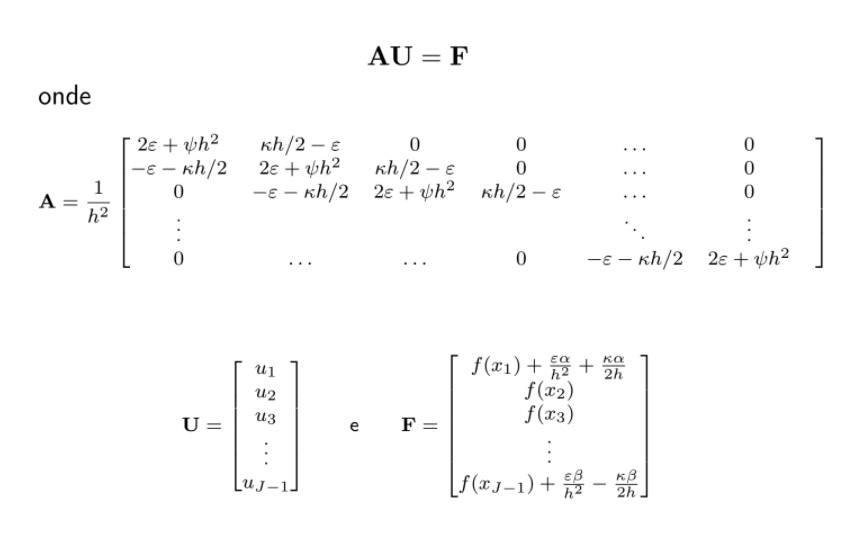

#Questão 1 - Difusão Reação


Problema de Helmholtz
\begin{eqnarray}
 \dfrac{d^2 p}{d x^2} + k^2p=0,  \ \ \ \ p \in Ω = [a,b].\\
 -\dfrac{d^2 p}{d x^2} = k^2p,  \ \ \ \ p \in Ω = [a,b].
\end{eqnarray}
\\
\begin{eqnarray}
 p(a) = \alpha,  \ \ \ \ p(b) = \beta.
\end{eqnarray}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Solução Exata
$$
p(x)= e^{ikx} = cos(kx) + i sen(kx)\\
$$
Considere apenas:
$$
p(x) = cos(kx)
$$

In [ ]:
def f(k,x):
  return k*k*np.cos(k*x)

def exata(k,x):
  return np.cos(k*x)

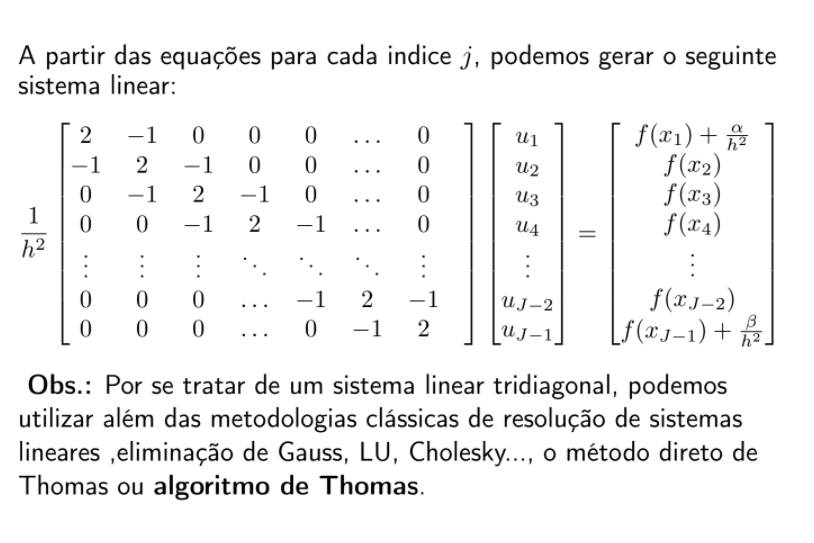


Algoritmo de Thomas largura de banda 3 \\
a = diagonal inferior \\
b = diagonal central \\
c = diagonal superior

In [ ]:
def TDMASolveBandWidth3(a, b, c, d):
  nmax = len(d)#n em números é linhas

  # Modifica o primeiro coeficiente de cada linha
  c[0] /= b[0] #Risco de divisão por zero.
  d[0] /= b[0]

  for i in range(1, nmax):
    ptemp = b[i] - (a[i] * c[i-1])
    c[i] /= ptemp
    d[i] = (d[i] - a[i] * d[i-1])/ptemp

  #Substituição de volta
  x = [0 for i in range(nmax)]
  x[-1] = d[-1]
  for i in range(-2,-nmax-1,-1):
    x[i] = d[i] - c[i] * x[i+1]
  return x

Condição estabilidade
$$
kh < 1
$$
Valores de k:
$$
k = 10, 100, 1000
$$
Domínio Ω :
$$
Ω = [0,1]
$$

estável
0.01


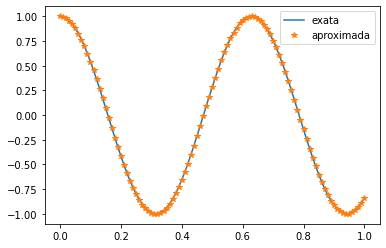

estável
0.001


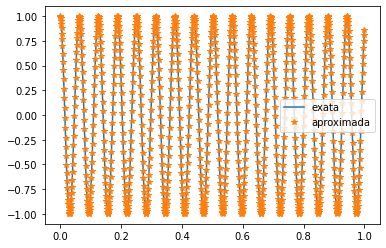

estável
0.0001


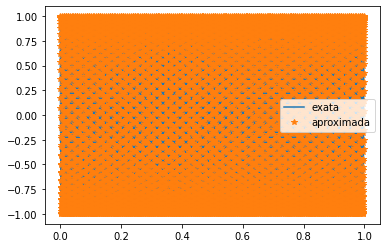

In [ ]:
for i in range (3):
  xi = 0
  xf = 1
  nel = 10**(i+2)
  h = (xf-xi)/nel
  h2 = h*h

  x = np.linspace(xi,xf,nel+1)
  u = np.zeros(nel+1)
  k = [10,100,1000]

  #construcao da matriz
  a = -np.ones(nel-1)/h2
  b = 2*np.ones(nel-1)/h2
  c = -np.ones(nel-1)/h2

  #condicoes de contorno de Dirichlet
  u[0] = exata(k[i], x[0])
  u[nel] = exata(k[i], x[nel])

  # construcao do vetor fonte 
  F = f(k[i],np.linspace(xi+h,xf-h,nel-1))

  # contribuicao das condicoes de contorno no termo fonte 
  # nel - 1 E o 0 do python
  F[0] = F[0] + u[0]/h2
  F[nel-2] = F[nel-2] + u[nel]/h2 

  #resolve sistema por Thomas
  u[1:nel] = TDMASolveBandWidth3(a,b,c,F)

  if k[i]*h < 1:
    print("estável")
  else:
    print("instável")
  print(h)
  xx = np.linspace(xi,xf,nel+1)
  plt.plot(xx,exata(k[i],xx), x,u, "*")
  plt.legend(["exata", "aproximada"])
  plt.show()

[0. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10


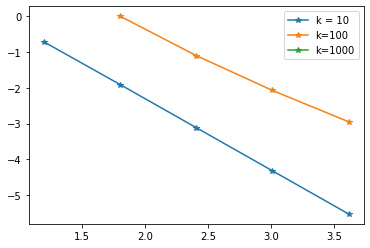

K = 10:   1.9941105198799687
K = 100:   1.631446422114148
K = 1000:   nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
er = 5
errok10 = np.zeros(er)
errok100 = np.zeros(er)
errok1000 = np.zeros(er)
refin = np.zeros(er)
xi = 0
xf = 1

for i in range (3):
  for j in range(er):
    xi = 0
    xf = 1
    nel = 4**(j+2)
    hh = (xf-xi)/nel
    h2 = h*h

    x = np.linspace(xi,xf,nel+1)
    u = np.zeros(nel+1)
    k = [10,100,1000]

    #construcao da matriz
    a = -np.ones(nel-1)/h2
    b = 2*np.ones(nel-1)/h2
    c = -np.ones(nel-1)/h2

    #condicoes de contorno de Dirichlet
    u[0] = exata(k[i], x[0])
    u[nel] = exata(k[i], x[nel])

    # construcao do vetor fonte 
    F = f(k[i],np.linspace(xi+h,xf-h,nel-1))

    # contribuicao das condicoes de contorno no termo fonte 
    # nel - 1 E o 0 do python
    F[0] = F[0] + u[0]/h2
    F[nel-2] = F[nel-2] + u[nel]/h2 

    #resolve sistema por Thomas
    u[1:nel] = TDMASolveBandWidth3(a,b,c,F)

    if i == 1:
      errok10[j] = np.max(u - exata(10,hh) )

    if i == 2:
      errok100[j] = np.max(u - exata(100,hh) )

    if i == 3:
      errok1000[j] = np.max(u - exata(1000,hh) )

    refin[j] = hh

plt.plot(-np.log10(refin),np.log10(errok10),'-*')
plt.plot(-np.log10(refin[1:]),np.log10(errok100[1:]),'-*')
plt.plot(-np.log10(refin),np.log10(errok1000),'-*')
print(errok1000)
plt.legend(["k = 10", "k=100", "k=1000"])
plt.show()
print("K = 10:  ", (np.log10(errok10[er-1])-np.log10(errok10[0]))/(np.log10(refin[er-1])-np.log10(refin[0])))
print("K = 100:  ", (np.log10(errok100[er-1])-np.log10(errok100[1]))/(np.log10(refin[er-1])-np.log10(refin[1])))
print("K = 1000:  ", (np.log10(errok1000[er-1])-np.log10(errok1000[0]))/(np.log10(refin[er-1])-np.log10(refin[0])))


#Questão 2 - Difusão Convecção


Problema de difusão convecção
\begin{eqnarray}
 ϵ\dfrac{d^2 p}{d x^2} + κ\dfrac{du}{dx} = 0,  \ \ \ \ u \in Ω = [a,b].
\end{eqnarray}
\begin{eqnarray}
  \dfrac{du}{dx}(0) = 1,  \ \ \ \ u(1) = 1.
\end{eqnarray}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Solução Exata
$$
u(x)= Ae^{-\dfrac{κ}{ϵ}x} + B\\
$$
Considere:
\begin{eqnarray}
  ϵ = 10^{-2},  \ \ \ \ κ = 1.
\end{eqnarray}


Domínio Ω :
$$
Ω = [0,1]
$$

In [ ]:
def exata(A, B, epsilon, kappa, x):
  return A*np.exp((-kappa/epsilon)*x) + B

def dexata(A, B, epsilon, kappa, x):
  return  -100*A*np.exp((-kappa/epsilon)*x)
  
def f(x):
  return 0*x

In [ ]:
def TDMASolveBandWidth3(a, b, c, d):
  nmax = len(d)#n em números é linhas

  # Modifica o primeiro coeficiente de cada linha
  c[0] /= b[0] #Risco de divisão por zero.
  d[0] /= b[0]

  for i in range(1, nmax):
    ptemp = b[i] - (a[i] * c[i-1])
    c[i] /= ptemp
    d[i] = (d[i] - a[i] * d[i-1])/ptemp

  #Substituição de volta
  x = [0 for i in range(nmax)]
  x[-1] = d[-1]
  for i in range(-2,-nmax-1,-1):
    x[i] = d[i] - c[i] * x[i+1]
  return x

###Diferença Central

Diferença Central Instável


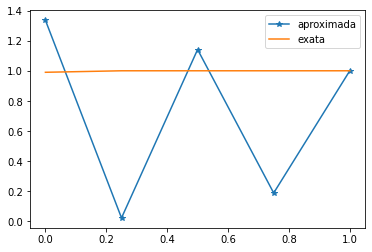

Diferença Central Instável


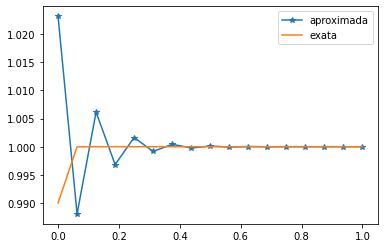

Diferença Central Estável


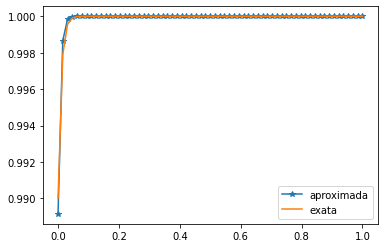

Diferença Central Estável


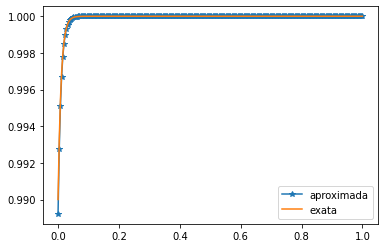

In [ ]:
for j in range(4):
  nel = 4**(j+1)
  xi = 0
  xf = 1
  h = (xf-xi)/nel
  h2 = h*h
  x = np.linspace(xi,xf, nel+1)
  xx = np.linspace(xi,xf, nel+1)
  u = np.zeros(nel+1)

  A = -0.01
  B = 1.00
  epsilon = 0.01
  kappa = 1

  if (h <= 2*epsilon/kappa):
    print("Diferença Central Estável")
  else:
    print("Diferença Central Instável")

  Peh = kappa*h/epsilon

  dalfa = 1
  beta = exata(A, B, epsilon, kappa, x[nel-1])

  a = ( epsilon - (kappa*h/2)) /h2 * np.ones(nel)
  b = ( -2*epsilon * np.ones(nel) ) / h2
  c = ( epsilon + (kappa*h/2)) /h2 * np.ones(nel)
  F = np.zeros(nel)

  #Neumann
  a[0] = 0
  c[0] = 2*epsilon/(h2)
  c[-1] = 0
  F[0] += 2*epsilon*dalfa/h - kappa*dalfa/2

  #Dirichlet
  F[-1] += (-epsilon*beta)/h2 - (kappa*beta)/(2*h)
  u[-1] = beta

  #resolve sistema por Thomas
  u[0:nel] = TDMASolveBandWidth3(a, b, c, F)

  plt.plot(x,u,"-*", xx,exata(A, B, epsilon, kappa, xx))
  plt.legend(["aproximada","exata"])
  plt.show()

  xDC = x
  centrada = u

###Diferença Progressiva

Diferença Progressiva Instável


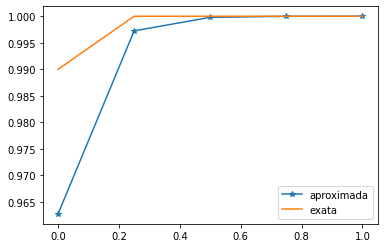

Diferença Progressiva Instável


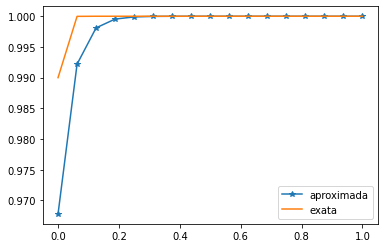

Diferença Progressiva Instável


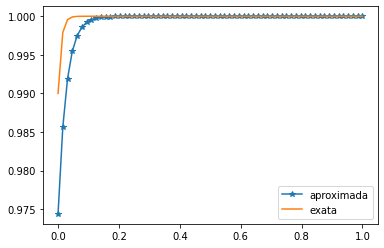

Diferença Progressiva Estável


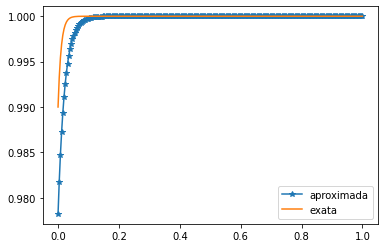

In [ ]:
for j in range(4):
  nel = 4**(j+1)
  xi = 0
  xf = 1
  h = (xf-xi)/nel
  h2 = h*h
  x = np.linspace(xi,xf, nel+1)
  xx = np.linspace(xi,xf, nel+1)
  u = np.zeros(nel+1)

  A = -0.01
  B = 1.00
  epsilon = 0.01
  kappa = 1

  if (h <= epsilon/kappa):
    print("Diferença Progressiva Estável")
  else:
    print("Diferença Progressiva Instável")

  Peh = kappa*h/epsilon

  dalfa = 1
  beta = exata(A, B, epsilon, kappa, x[nel-1])

  a = ( epsilon  ) /h2 * np.ones(nel)
  b = ( -2*epsilon  - (kappa*h/2) ) /h2 * np.ones(nel)
  c = ( epsilon + (kappa*h/2) ) /h2 * np.ones(nel)
  F = np.zeros(nel)

  #Neumann
  a[0] = 0
  c[0] = (2*epsilon + (kappa*h/2) )/(h2)
  c[-1] = 0
  F[0] += 2*epsilon*dalfa/h  

  #Dirichlet
  F[-1] += (-epsilon*beta)/h2 - (kappa*beta)/(2*h)
  u[-1] = beta

  #resolve sistema por Thomas
  u[0:nel] = TDMASolveBandWidth3(a, b, c, F)

  plt.plot(x,u,"-*", xx,exata(A, B, epsilon, kappa, xx))
  plt.legend(["aproximada","exata"])
  plt.show()

###Diferença Regressiva

$$
\epsilon \dfrac{u_1 - 2u_0 + u_{-1}}{h^2} + Κ \dfrac{u_0 - u_{-1}}{2h} = f(x_0)
$$
$$
-\dfrac{u_1 - 2u_0 + u_0 - \alpha h}{h^2} + Κ \dfrac{u_0 - u_0 - \alpha h}{2h}= f(x_0)
$$
$$
-ϵ \dfrac{u_1 - u_0}{h^2} + K \dfrac{u_0 - u_0}{2h}= f(x_0) - ϵ \dfrac{\alpha}{h} + κ \dfrac{\alpha}{2}
$$

Diferença Regressiva


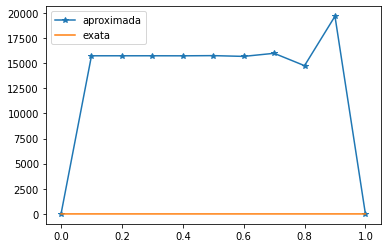

1.0
Diferença Regressiva


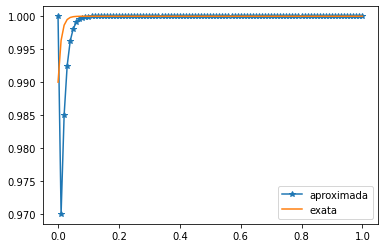

1.0
Diferença Regressiva


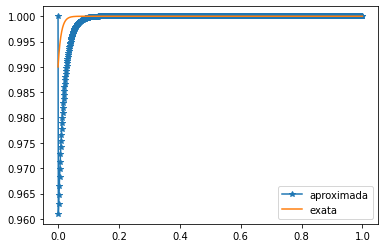

1.0
Diferença Regressiva


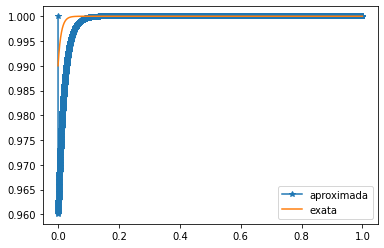

1.0


In [ ]:
for j in range(4):
  nel = 10**(j+1)
  xi = 0
  xf = 1
  h = (xf-xi)/nel
  h2 = h*h
  x = np.linspace(xi,xf, nel+1)
  xx = np.linspace(xi,xf, nel+1)
  u = np.zeros(nel+1)

  A = -0.01
  B = 1.00
  epsilon = 0.01
  kappa = 1

  print("Diferença Regressiva")

  Peh = kappa*h/epsilon

  dalfa = 1
  beta = exata(A, B, epsilon, kappa, x[nel-1])

  a = ( epsilon - (kappa*h/2) ) /h2 * np.ones(nel-1)
  b = ( -2*epsilon + (kappa*h/2) ) /h2 * np.ones(nel-1)
  c = ( epsilon ) /h2 * np.ones(nel-1)
  F = np.zeros(nel-1)

  #Neumann
  a[0] = 0
  b[0] = -epsilon/h2 
  c[0] = epsilon/h2 
  u[0] = dexata(A, B, epsilon, kappa, x[0]);
  F[0] += 2*epsilon*u[0]/h - kappa*u[0]/2

  #Dirichlet
  c[-1] = 0
  F[-1] += (-epsilon*beta)/h2
  u[-1] = beta

  #resolve sistema por Thomas
  u[1:nel] = TDMASolveBandWidth3(a, b, c, F)

  plt.plot(x,u,"-*", xx,exata(A, B, epsilon, kappa, xx))
  plt.legend(["aproximada","exata"])
  plt.show()
  print(u[0])

###Difusão Artificial

Difusão Artificial: 


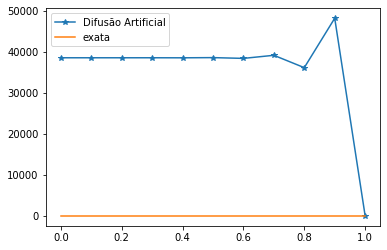

Difusão Artificial: 


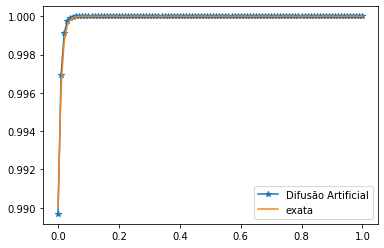

Difusão Artificial: 


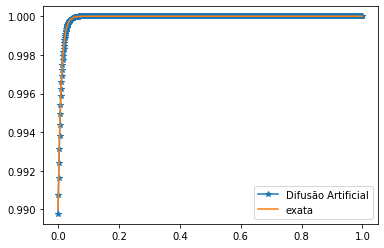

Difusão Artificial: 


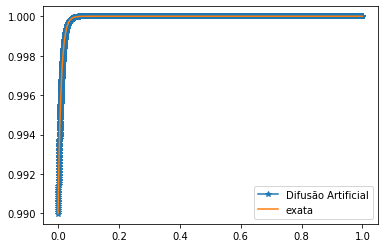

In [ ]:
for j in range(4):
  nel = 10**(j+1)
  xi = 0
  xf = 1
  h = (xf-xi)/nel
  h2 = h*h
  x = np.linspace(xi,xf, nel+1)
  xx = np.linspace(xi,xf, nel+1)
  u = np.zeros(nel+1)

  A = -0.01
  B = 1.00
  epsilon = 0.01
  kappa = 1
  Peh = kappa*h/epsilon
  gammaOtimo = (np.exp(Peh) + 1)/(2*(np.exp(Peh) - 1)) - 1/Peh
  difArt = (epsilon - gammaOtimo*kappa*h)

  print("Difusão Artificial: ")

  Peh = kappa*h/epsilon

  dalfa = 1
  beta = exata(A, B, epsilon, kappa, x[nel-1])

  a = ( difArt - (kappa*h/2)) /h2 * np.ones(nel)
  b = ( -2*difArt * np.ones(nel) ) / h2
  c = ( difArt + (kappa*h/2)) /h2 * np.ones(nel)
  F = np.zeros(nel)

  #Neumann
  a[0] = 0
  c[0] = 2*difArt/(h2)
  c[-1] = 0
  F[0] += 2*difArt*dalfa/h - kappa*dalfa/2

  #Dirichlet
  F[-1] += (-difArt*beta)/h2 - (kappa*beta)/(2*h)
  u[-1] = beta

  #resolve sistema por Thomas
  u[0:nel] = TDMASolveBandWidth3(a, b, c, F)

  plt.plot(x,u,"-*", xx,exata(A, B, epsilon, kappa, xx))
  plt.legend(["Difusão Artificial","exata"])
  plt.show()

  xDA = x
  difusaoArtificial = u

###Comparativo Diferença Centrada e Difusão Artificial

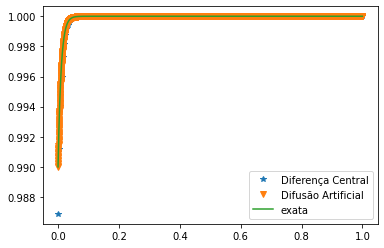

In [ ]:
plt.plot(xDC, centrada,"*", xDA,difusaoArtificial, "v", xx,exata(A, B, epsilon, kappa, xx))
plt.legend(["Diferença Central", "Difusão Artificial","exata"])
plt.show()